In [2]:
from scipy import io
from scipy.stats import mode
from heapq import nsmallest
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# global vars used throughout file
dct = io.loadmat('./hw1data.mat')
X = dct['X'].astype(int) # see piazza @35
Y = dct['Y'].astype(int)
N, K, D = 10000, 10, 784
STEP_SIZE = 1e-6
MAX_ITER = 10000

In [5]:
# norm, eval_f, and plot_run are same for (ii) and (iv)

def norm(v):
    return sum(np.dot(v,v))


def eval_f(theta):
    """ evaluates f at theta"""
    result = 0
    
    for i in range(N):
        label = Y[i]
        vec = X[i] - theta[label] # vectorizing sum, numpy broadcasting
        result += -0.5 * np.dot(vec, vec)
        
    return result

def plot_run(f_vals, step_size):
    plt.figure()
    plt.plot(range(iterations),f_values,'ro')
    plt.title('step size ' + str(step_size))
    plt.show()

In [6]:
# (ii) function definitions
def grad_of_f(theta):
    """returns gradient of f valued at theta"""
    grad = np.zeros(10)
    for i in range(N):
        label = Y[i]
        grad[label] += sum(X[i] - theta[label]) # numpy broadcasting
    
    return grad

def optimize_theta(theta, step_size, max_iter):
    """iterative optimization algorithm from 4(ii)
    
    returns array of function value from iterations
    """
    f_vals = [eval_f(theta)] # starting f value
    i = 0
    
    while i < max_iter:
        grad = grad_of_f(theta)
        if (norm(grad) < 1e-8): # if optimal value reached
            break
        theta -= step_size * grad # else descend theta
        f_vals.append(eval_f(theta))
        i += 1
    
    return f_vals

In [7]:
# (ii) run
theta = np.zeros(K)
f_vals = optimize_theta(theta, STEP_SIZE, MAX_ITER)
plot_run(f_vals, STEP_SIZE)

TypeError: 'numpy.float64' object is not iterable

In [ ]:
# (iv), (v) function definitions

def fast_grad_of_f(theta, sample):
    """returns approximate fast gradient of f using single sample x"""
    x, label = sample[:-1], sample[-1]
    grad = np.zeros(10)
    grad[label] += N * sum(x - theta[label]) # scale grad by N
    return grad

def draw_hist(theta, X_Y):
    """draws histogram as specified in (v)"""
    fast_grads = [fast_grad_of_f(theta, X_Y[i]) for i in range(N)]
    grad = grad_of_f(theta)
    
    

def fast_optimize_theta(theta, step_size, max_iter):
    """iterative optimization algorithm from 4(iv)
    
    returns array of function value from iterations
    """
    f_vals = [eval_f(theta)] # starting f value
    X_Y = np.concatenate((X, Y), axis=1) # concat for permuting data
    i, histogram_step = 0, random.randrange(max_iter) # arbitrary step to draw histogram 
    
    while i < max_iter:
        np.random.permutation(X_Y) # permute again if dataset exhausted
            
        for j in range(N):
            # do (v) at arbitrary step
            if i == histogram_step:
                draw_hist(theta)
                
            grad = fast_grad_of_f(theta, sample=X_Y[j])
            if (norm(grad) < 1e-8): # if optimal value reached
                return f_vals
            theta -= step_size * grad # else descend theta
            f_vals.append(eval_f(theta))
            i += 1
    
    return f_vals

In [ ]:
# (v), (vi) run
theta = np.zeros(K)
fast_f_vals = fast_optimize_theta(theta, STEP_SIZE, MAX_ITER)
plot_run(fast_f_vals, STEP_SIZE)

In [12]:
#################### Rui's #######################
Matrix = io.loadmat('./hw1data.mat')
X_Y = np.concatenate((Matrix['X'],Matrix['Y']),axis=1)
# print(X_Y.shape)
n = len(X_Y) # 10000
d = 784

In [13]:
count = np.zeros(10)
sum_element = np.zeros(10)
sum_sq_element = np.zeros(10)
# print(count, sum_element, sum_sq_element)

for data in X_Y:
    # inc count[label]
    i = int(data[d])
    count[i]+=1 
    for j in range(784):
        sum_element[i]+=data[j]
        sum_sq_element[i]+=data[j]**2

# Iterations:50000
Minimum of f appears at theta=[ 44.27924043  19.75893899  37.44431081  35.87573814  30.72689478
  31.51604632  34.50088699  28.97490797  37.49111282  31.21297206]
First derivative at minimum point: [-754912.69148861 -209821.75395381 -693803.98572783 -489572.3669293
 -530145.2850626  -664811.39825932 -534461.03501291 -421343.64695031
 -646851.45811004 -482076.17523907]


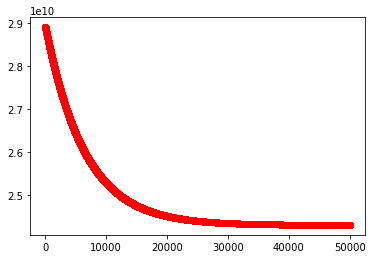

In [20]:
#print sum_element, count
def norm_f(v):
    return sum(v*v)
def eval_f(theta):
    f = 0
    f+=sum(sum_sq_element) - 2*sum(sum_element*theta) + 784*sum(count*theta**2)
    f = f*0.5
    return f
theta = np.zeros(10)
delta_f = 784*theta*count-sum_element
f_values = []
iterations=0
it_max = 50000
while (norm_f(delta_f)>=1e-16) and (iterations<it_max) :
        n = 0.0000000001
        theta = theta - n*delta_f
        delta_f = 784*theta*count-sum_element
        f = eval_f(theta)
        f_values.append(f)
        #print delta_f
        iterations+=1

print('# Iterations:' + str(iterations))
print('Minimum of f appears at theta='+str(theta))
print('First derivative at minimum point: '+str(delta_f))
plt.plot(range(iterations),f_values,'ro')
plt.show()